In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from category_encoders import OneHotEncoder
from xgboost import XGBRegressor
%matplotlib inline

In [14]:
X = pd.read_csv('../KivaLoans_data/X_matrix2.csv')

In [15]:
y = pd.read_csv('../KivaLoans_data/y_matrix2.csv')

In [4]:
funded_index = y[y['loan_funded'] == 1].index

In [5]:
X = X.iloc[funded_index]

In [6]:
y = y.iloc[funded_index]['TimetoFundMinutes']

In [7]:
X.shape, y.shape

((622873, 14), (622873,))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
from sklearn.pipeline import Pipeline

In [10]:
xgb1 = XGBRegressor(objective='reg:squarederror', n_jobs=2)
ohe = OneHotEncoder(use_cat_names=True)

In [11]:
pipe1 = Pipeline([('ohe', ohe), ('xgb', xgb1)])

In [13]:
pipe1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['activity', 'sector', 'country',
                                     'repayment_interval', 'PostedDayofWeek'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=2,
                              nthread=None, objective='reg:squarederror',
                              random_state=0, reg_alpha=0, reg_lambda=1,
  

In [14]:
pipe1.score(X_test, y_test)

0.43517708612598005

In [15]:
preds1 = pipe1.predict(X_test)

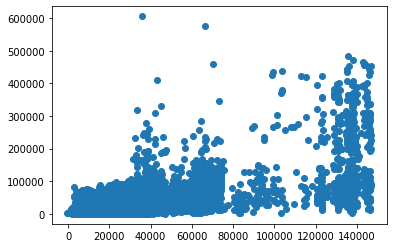

In [17]:
plt.scatter(preds1, y_test)

In [18]:
params1 = {
    'xgb__max_depth': [3, 5, 7]
} 

In [20]:
gsearch1 = GridSearchCV(pipe1, params1, scoring='r2', n_jobs=2, cv=3, verbose=4)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   9 out of   9 | elapsed: 14.3min remaining:    0.0s
[Parallel(n_jobs=2)]: Done   9 out of   9 | elapsed: 14.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ohe',
                                        OneHotEncoder(cols=['activity',
                                                            'sector', 'country',
                                                            'repayment_interval',
                                                            'PostedDayofWeek'],
                                                      drop_invariant=False,
                                                      handle_missing='value',
                                                      handle_unknown='value',
                                                      return_df=True,
                                                      use_cat_names=True,
                                                      verbose=0)),
                                       ('xgb',
                                        XGBRegressor(base_score=0.5

In [21]:
gsearch1.score(X_test, y_test)

0.505991701741332

In [22]:
gsearch1.best_params_, gsearch1.best_score_

({'xgb__max_depth': 7}, 0.5044714273915619)

In [12]:
pipe1.steps[-1][1].set_params(max_depth=7)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=2, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [24]:
pipe1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['activity', 'sector', 'country',
                                     'repayment_interval', 'PostedDayofWeek'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=7, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=2,
                              nthread=None, objective='reg:squarederror',
                              random_state=0, reg_alpha=0, reg_lambda=1,
  

In [25]:
import pickle

with open('xgbr_timefund1.pickle', 'wb') as f:
    pickle.dump(pipe1, f)

In [27]:
pipe1.score(X_test, y_test)

0.505991701741332

In [13]:
params2 = {
    'xgb__n_estimators': [300, 500]
} 

In [14]:
gsearch2 = GridSearchCV(pipe1, params2, scoring='r2',n_jobs=3, cv=3, verbose=25)
gsearch2.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed: 11.4min
[Parallel(n_jobs=3)]: Done   2 out of   6 | elapsed: 11.4min remaining: 22.7min
[Parallel(n_jobs=3)]: Done   3 out of   6 | elapsed: 11.4min remaining: 11.4min
[Parallel(n_jobs=3)]: Done   4 out of   6 | elapsed: 29.5min remaining: 14.8min
[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed: 29.5min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed: 29.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ohe',
                                        OneHotEncoder(cols=None,
                                                      drop_invariant=False,
                                                      handle_missing='value',
                                                      handle_unknown='value',
                                                      return_df=True,
                                                      use_cat_names=True,
                                                      verbose=0)),
                                       ('xgb',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                              

In [15]:
gsearch2.best_params_, gsearch2.best_score_

({'xgb__n_estimators': 500}, 0.5250962186212741)

In [16]:
gsearch2.score(X_test, y_test)

0.5384523272879211

In [17]:
pipe1.set_params(**gsearch2.best_params_)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=None, drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=7, min_child_weight=1,
                              missing=None, n_estimators=500, n_jobs=2,
                              nthread=None, objective='reg:squarederror',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1))],
       

In [18]:
pipe1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['activity', 'sector', 'country',
                                     'repayment_interval', 'PostedDayofWeek'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=7, min_child_weight=1,
                              missing=None, n_estimators=500, n_jobs=2,
                              nthread=None, objective='reg:squarederror',
                              random_state=0, reg_alpha=0, reg_lambda=1,
  

In [20]:
import pickle
with open('xgbr_timefund2.pickle', 'wb') as f:
    pickle.dump(pipe1, f)

In [21]:
preds_g2 = pipe1.predict(X_test)

In [50]:
preds_g2 = np.maximum(0, preds_g2)

In [23]:
from sklearn.metrics import r2_score, mean_squared_log_error

In [51]:
r2_score(y_test, preds_g2)

0.5384734018188746

In [52]:
mean_squared_log_error(y_test, preds_g2)

0.7845940819921131

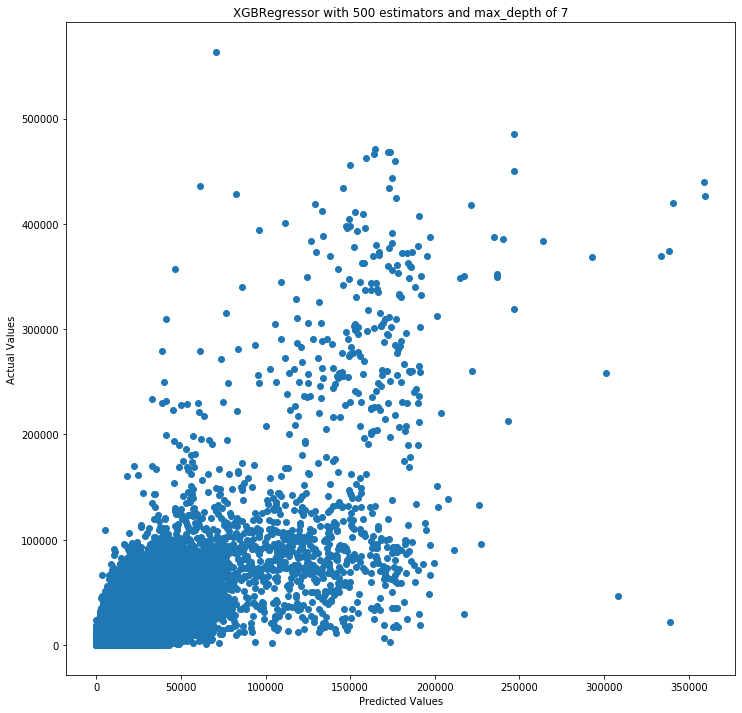

In [48]:
import utils
from importlib import reload
reload(utils)
utils.plot_predictions(y_test, preds_g2, title='XGBRegressor with %d estimators and max_depth of 7' % gsearch2.best_params_['xgb__n_estimators'], 
                       figsize=(12,12), save_to='timefunded_predsXgboost1.png')

In [31]:
params3 = {
    'xgb__min_child_weight': [3, 6],
    'xgb__subsample': [0.6, 0.8]
} 

In [32]:
gsearch3 = GridSearchCV(pipe1, params3, scoring='r2', n_jobs=4, cv=3, verbose=50)
gsearch3.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed: 19.1min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed: 22.1min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed: 22.1min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed: 22.2min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 38.5min
[Parallel(n_jobs=4)]: Done   6 out of  12 | elapsed: 41.2min remaining: 41.2min
[Parallel(n_jobs=4)]: Done   7 out of  12 | elapsed: 43.8min remaining: 31.3min
[Parallel(n_jobs=4)]: Done   8 out of  12 | elapsed: 44.0min remaining: 22.0min
[Parallel(n_jobs=4)]: Done   9 out of  12 | elapsed: 60.3min remaining: 20.1min
[Parallel(n_jobs=4)]: Done  10 out of  12 | elapsed: 60.4min remaining: 12.1min
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 62.4min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 62.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ohe',
                                        OneHotEncoder(cols=['activity',
                                                            'sector', 'country',
                                                            'repayment_interval',
                                                            'PostedDayofWeek'],
                                                      drop_invariant=False,
                                                      handle_missing='value',
                                                      handle_unknown='value',
                                                      return_df=True,
                                                      use_cat_names=True,
                                                      verbose=0)),
                                       ('xgb',
                                        XGBRegressor(base_score=0.5

In [33]:
gsearch3.best_params_, gsearch3.best_score_

({'xgb__min_child_weight': 3, 'xgb__subsample': 0.8}, 0.5196704230391548)

In [34]:
pipe1.set_params(**gsearch3.best_params_).fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['activity', 'sector', 'country',
                                     'repayment_interval', 'PostedDayofWeek'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=7, min_child_weight=3,
                              missing=None, n_estimators=500, n_jobs=2,
                              nthread=None, objective='reg:squarederror',
                              random_state=0, reg_alpha=0, reg_lambda=1,
  

In [35]:
with open('xgbr_timefund3.pickle', 'wb') as f:
    pickle.dump(pipe1, f)

In [42]:
preds_g3 = pipe1.predict(X_test)
preds_g3 = np.maximum(0, preds_g3)

In [43]:
r2_score(y_test, preds_g3)

0.5443485814350504

In [44]:
mean_squared_log_error(y_test, preds_g3)

0.7975728775485428

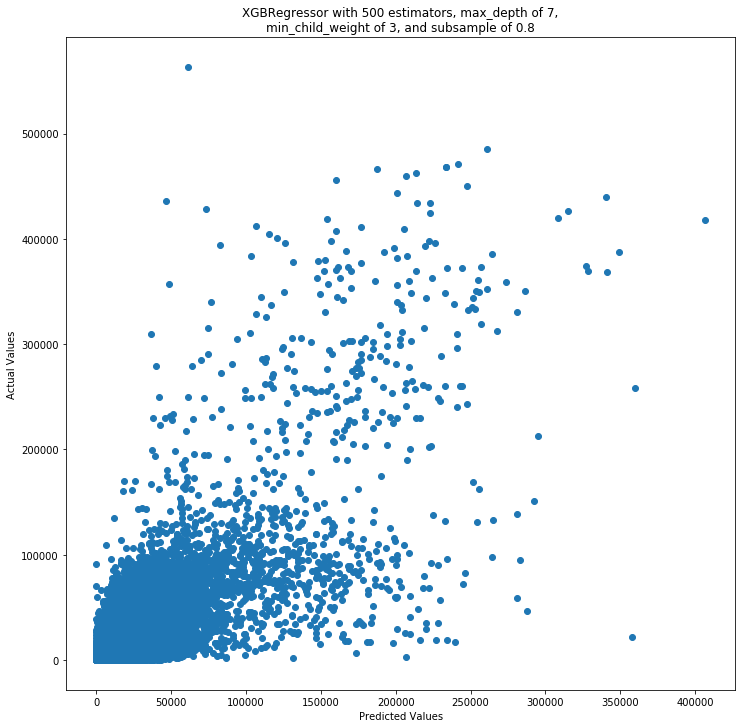

In [49]:
utils.plot_predictions(y_test, preds_g3, title='XGBRegressor with 500 estimators, max_depth of 7,\nmin_child_weight of %d, and subsample of %.1f' % (gsearch3.best_params_['xgb__min_child_weight'], gsearch3.best_params_['xgb__subsample']), 
                       figsize=(12,12), save_to='timefunded_predsXgboost2.png')

In [54]:
X_train.columns

Index(['loan_amount', 'activity', 'sector', 'country', 'term_in_months',
       'lender_count', 'repayment_interval', 'PartnerPresent',
       'PostedTimeofDay', 'PostedDayofWeek', 'NumberofBorrowers',
       'PercentFemaleBorrowers', 'CountWordsinDesc', 'NumberofTags'],
      dtype='object')

In [1]:
import pickle
with open('xgbr_timefund3.pickle', 'rb') as f:
    loadpipe = pickle.load(f)

In [3]:
loadpipe

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['activity', 'sector', 'country',
                                     'repayment_interval', 'PostedDayofWeek'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=7, min_child_weight=3,
                              missing=nan, n_estimators=500, n_jobs=2,
                              nthread=None, objective='reg:squarederror',
                              random_state=0, reg_alpha=0, reg_lambda=1,
   

In [9]:
feats = loadpipe.steps[0][1].get_feature_names()
imps = loadpipe.steps[-1][1].feature_importances_
feat_imps = pd.Series(imps, index=feats).sort_values(ascending=False)

PartnerPresent                              0.194463
sector_Education                            0.034247
repayment_interval_monthly                  0.029641
sector_Arts                                 0.017776
sector_Manufacturing                        0.017292
country_Lao People's Democratic Republic    0.016423
sector_Health                               0.015837
sector_Retail                               0.012911
NumberofTags                                0.012479
country_El Salvador                         0.012355
dtype: float32


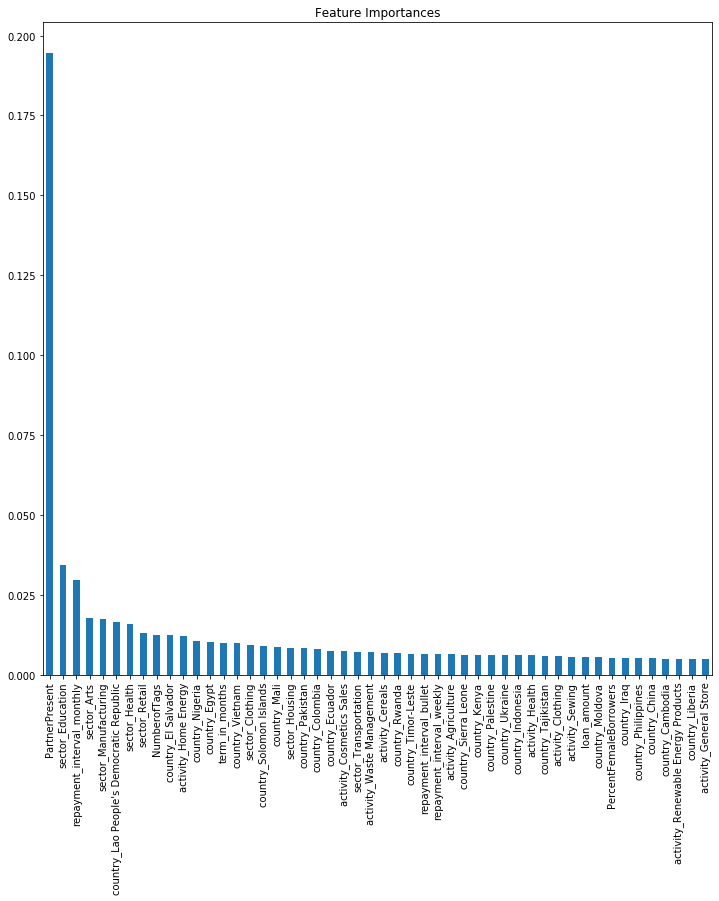

In [13]:
plt.figure(figsize=(12, 12))
print(feat_imps[:10])
feat_imps[:50].plot(kind='bar', title='Feature Importances')

In [17]:
loadpipe.score(X, y['TimetoFundMinutes'])

-0.0787654067545629